# Практическая работа №2

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn import preprocessing
import time
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

## Задание 1

Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.

In [54]:
!pwd
df = pd.read_csv('/Users/teranikys/Documents/CodeProjects/university/BD/data_population2023.csv')

1470547.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
/home/jovyan


FileNotFoundError: [Errno 2] No such file or directory: '/Users/teranikys/Documents/CodeProjects/university/BD/data_population2023.csv'

Датасет содержит информацию о населении некоторых стран мира в 2023 году, а также плотность населения, площадь страны, количество различных типов учебных заведений и другие параметры.

## Задание 2

Вывести информацию о данных при помощи методов .info(), .head().

Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения.

При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sr.no.                      136 non-null    int64  
 1   province                    136 non-null    object 
 2   division                    136 non-null    object 
 3   district                    136 non-null    object 
 4   households                  136 non-null    int64  
 5   population_2023             136 non-null    int64  
 6   average_household_size      136 non-null    float64
 7   population_2017             136 non-null    int64  
 8   growth_rate                 136 non-null    float64
 9   area(km²)                   136 non-null    int64  
 10  density_2023(people/km²)    136 non-null    float64
 11  primary_boys_schools        136 non-null    int64  
 12  primary_girls_schools       136 non-null    int64  
 13  secondary_boys_schools      136 non

In [5]:
df.head()

,sr.no.,province,division,district,households,population_2023,average_household_size,population_2017,growth_rate,area(km²),...,primary_girls_schools,secondary_boys_schools,secondary_girls_schools,high_boys_schools,high_girls_schools,Intermediate_boys_schools,Intermediate_girls_schools,total_boys_schools,total_girls_schools,total_schools
0,1,Balochistan,Kalat,Awaran,27808,178958,6.44,121821,6.64,29510,...,107,24,13,29,10,2,2,249,132,381
1,2,Balochistan,Kalat,Kalat,33415,272506,8.16,211201,4.35,6622,...,84,23,18,27,17,1,1,269,120,389
2,3,Balochistan,Kalat,Khuzdar,161594,997214,6.17,798896,3.78,35380,...,177,45,46,32,21,6,1,569,245,814
3,4,Balochistan,Kalat,Lasbela,115635,680977,5.89,576271,2.83,15153,...,124,46,29,27,11,4,4,507,168,675
4,5,Balochistan,Kalat,Mastung,43736,313271,7.16,265676,2.79,5896,...,94,24,31,18,18,2,0,268,143,411


In [6]:
df.isna().sum()

sr.no.                        0
province                      0
division                      0
district                      0
households                    0
population_2023               0
average_household_size        0
population_2017               0
growth_rate                   0
area(km²)                     0
density_2023(people/km²)      0
primary_boys_schools          0
primary_girls_schools         0
secondary_boys_schools        0
secondary_girls_schools       0
high_boys_schools             0
high_girls_schools            0
Intermediate_boys_schools     0
Intermediate_girls_schools    0
total_boys_schools            0
total_girls_schools           0
total_schools                 0
dtype: int64

In [7]:
df.nunique()

sr.no.                        136
province                        5
division                       31
district                      136
households                    136
population_2023               136
average_household_size        117
population_2017               136
growth_rate                   107
area(km²)                     132
density_2023(people/km²)      136
primary_boys_schools          125
primary_girls_schools         120
secondary_boys_schools         73
secondary_girls_schools        83
high_boys_schools              90
high_girls_schools             73
Intermediate_boys_schools      28
Intermediate_girls_schools     24
total_boys_schools            129
total_girls_schools           120
total_schools                 132
dtype: int64

## Задание 3

Построить столбчатую диаграмму (.bar) с использованием модуля graph_objs из библиотеки Plotly со следующими параметрами:

3.1. По оси Х указать дату или название, по оси У указать количественный показатель.

3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).

3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2

3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.

3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.

3.6. Размер текста меток осей сделать равным 14.

3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.

3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory')

3.9. Убрать лишние отступы по краям.

In [8]:
df.groupby('province').agg({'district':'count'}).head()

,district
province,
Balochistan,34
Capital_territory,1
KP,35
Punjab,36
Sindh,30


In [9]:
df_grouped = df.groupby('province').agg({'district':'count'}).reset_index().sort_values(by='district',ascending=False)

In [10]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_grouped['province'], 
    y=df_grouped['district'],
    marker=dict(
        color=list(range(len(df_grouped['province']))), 
        coloraxis="coloraxis",
        line=dict(color='black', width=2)
    )
))
fig.update_layout(
    title='Districts by province',
    title_font_size=20,
    title_x=0.5,
    xaxis_title='Province',
    xaxis_title_font_size=16,
    xaxis_tickfont_size=14,
    yaxis_title='Number of district',
    yaxis_title_font_size=16,
    yaxis_tickfont_size=14,
    height=700,
    showlegend=False,
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.update_xaxes(tickangle=315, showgrid=True, gridwidth=2)
fig.update_yaxes(showgrid=True, gridcolor='ivory', gridwidth=2)

fig.show()

### Задание 4

Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов)

In [11]:
fig = go.Figure()
fig.add_trace(go.Pie(
    ids=df_grouped['province'], 
    values=df_grouped['district'],
    labels=df_grouped['province'],
    hovertemplate='<b>%{label}</b><br>Количество: %{value}<br>Процент: %{percent}<extra></extra>',
    marker=dict(
        colors=list(range(len(df_grouped['province']))),
        line=dict(color='black', width=2)
    ),
    pull=[0.02] * len(df_grouped['province']),
    textfont_size=14
))
fig.update_layout(
    title='Districts by province',
    title_font_size=20,
    title_x=0.5,
    height=700,
    showlegend=False,
    margin=dict(l=0, r=0, t=50, b=10)
)
fig.update_xaxes(tickangle=315, showgrid=True, gridwidth=2)
fig.update_yaxes(showgrid=True, gridcolor='ivory', gridwidth=2)

fig.show()

### Задание 5

Построить линейные графики, взять один из параметров и определить зависимость между другими несколькими (от 2 до 5) показателями с использованием библиотеки matplotlib. Сделать вывод.

5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет точек 'white', цвет границ точек 'black', толщина границ точек равна 2.

5.2. Добавить сетку на график, сделать её цвет 'mistyrose' и толщину равную 2. (Можно сделать это при настройке осей с помощью linewidth=2, color='mistyrose').

In [12]:
df.head(1)

,sr.no.,province,division,district,households,population_2023,average_household_size,population_2017,growth_rate,area(km²),...,primary_girls_schools,secondary_boys_schools,secondary_girls_schools,high_boys_schools,high_girls_schools,Intermediate_boys_schools,Intermediate_girls_schools,total_boys_schools,total_girls_schools,total_schools
0,1,Balochistan,Kalat,Awaran,27808,178958,6.44,121821,6.64,29510,...,107,24,13,29,10,2,2,249,132,381


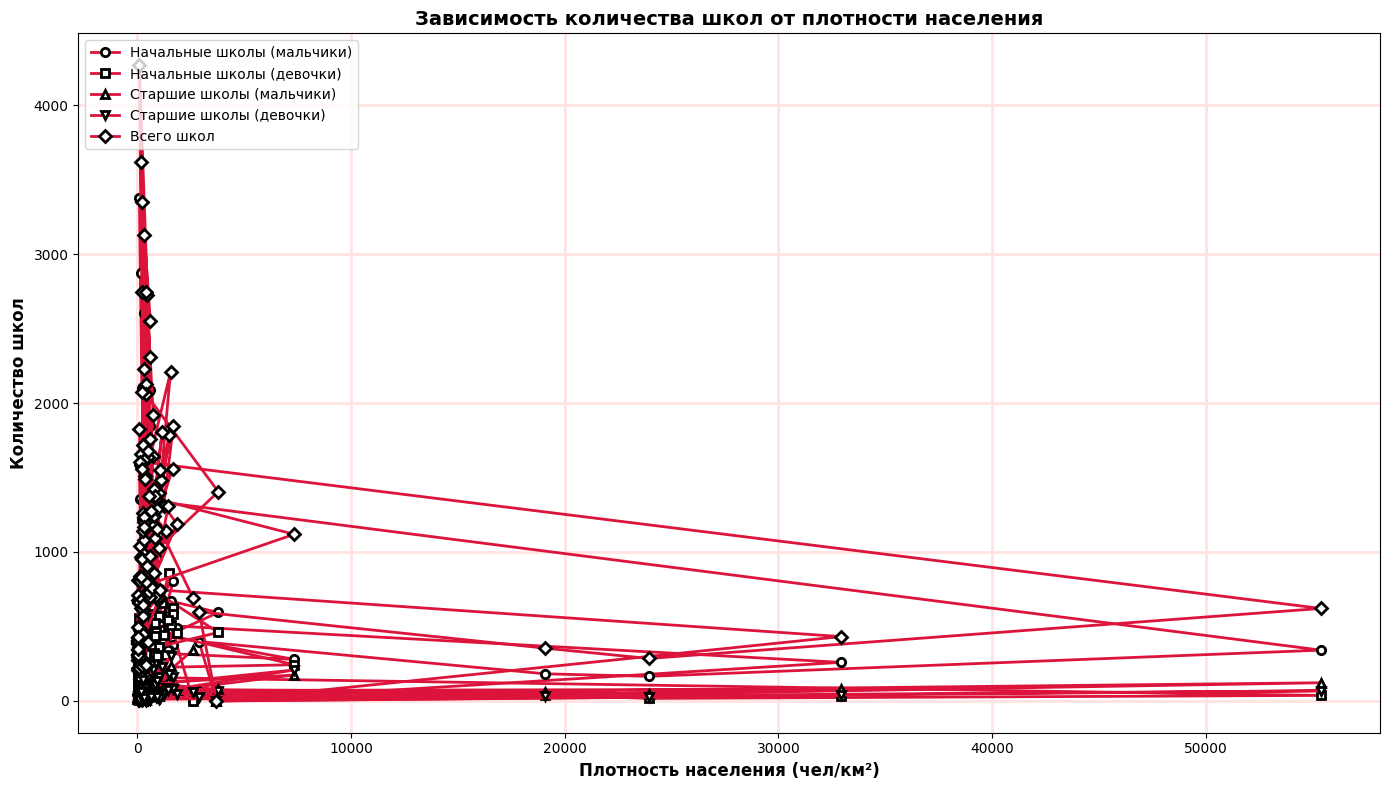

In [13]:
plt.figure(figsize=(14, 8))

plt.plot(df['density_2023(people/km²)'], df['primary_boys_schools'], 
         marker='o', linestyle='-', color='crimson', markerfacecolor='white', 
         markeredgecolor='black', markeredgewidth=2, label='Начальные школы (мальчики)', linewidth=2)

plt.plot(df['density_2023(people/km²)'], df['primary_girls_schools'], 
         marker='s', linestyle='-', color='crimson', markerfacecolor='white', 
         markeredgecolor='black', markeredgewidth=2, label='Начальные школы (девочки)', linewidth=2)

plt.plot(df['density_2023(people/km²)'], df['high_boys_schools'], 
         marker='^', linestyle='-', color='crimson', markerfacecolor='white', 
         markeredgecolor='black', markeredgewidth=2, label='Старшие школы (мальчики)', linewidth=2)

plt.plot(df['density_2023(people/km²)'], df['high_girls_schools'], 
         marker='v', linestyle='-', color='crimson', markerfacecolor='white', 
         markeredgecolor='black', markeredgewidth=2, label='Старшие школы (девочки)', linewidth=2)

plt.plot(df['density_2023(people/km²)'], df['total_schools'], 
         marker='D', linestyle='-', color='crimson', markerfacecolor='white', 
         markeredgecolor='black', markeredgewidth=2, label='Всего школ', linewidth=2)

plt.grid(True, color='mistyrose', linewidth=2)

plt.xlabel('Плотность населения (чел/км²)', fontsize=12, fontweight='bold')
plt.ylabel('Количество школ', fontsize=12, fontweight='bold')
plt.title('Зависимость количества школ от плотности населения', fontsize=14, fontweight='bold')

plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

На графике можно увидеть явную отрицательную корреляцию (которая подтверждается ниже) между плотностью населения и количеством школ, что интересно, ведь, казалось бы, чем больше людей в населенном пункте, тем больше должно быть учебных заведений для них, но тем не менее в данном случае это не так

In [14]:
print("Корреляция с плотностью населения:")
print(f"Начальные школы (мальчики): {df['primary_boys_schools'].corr(df['density_2023(people/km²)']):.3f}")
print(f"Начальные школы (девочки): {df['primary_girls_schools'].corr(df['density_2023(people/km²)']):.3f}")
print(f"Средние школы (мальчики): {df['high_boys_schools'].corr(df['density_2023(people/km²)']):.3f}")
print(f"Средние школы (девочки): {df['high_girls_schools'].corr(df['density_2023(people/km²)']):.3f}")
print(f"Всего школ: {df['total_schools'].corr(df['density_2023(people/km²)']):.3f}")

Корреляция с плотностью населения:
Начальные школы (мальчики): -0.097
Начальные школы (девочки): -0.152
Средние школы (мальчики): 0.132
Средние школы (девочки): 0.077
Всего школ: -0.115


### Задание 6

Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST (можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам). Рассмотреть результаты визуализации для разных значений перплексии.

In [15]:
df_filtered = df.drop(['sr.no.', 'province', 'division', 'district'], axis=1)

In [16]:
df_filtered = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_filtered),columns=df_filtered.columns)
df_filtered

,households,population_2023,average_household_size,population_2017,growth_rate,area(km²),density_2023(people/km²),primary_boys_schools,primary_girls_schools,secondary_boys_schools,secondary_girls_schools,high_boys_schools,high_girls_schools,Intermediate_boys_schools,Intermediate_girls_schools,total_boys_schools,total_girls_schools,total_schools
0,0.005715,0.003991,0.458418,0.002247,0.690733,0.658945,7.221521e-07,0.057481,0.100187,0.099585,0.046263,0.084058,0.033333,0.008584,0.039216,0.067590,0.096562,0.089248
1,0.008524,0.011256,0.807302,0.010356,0.443966,0.146668,6.342301e-04,0.064593,0.078652,0.095436,0.064057,0.078261,0.056667,0.004292,0.019608,0.073018,0.087783,0.091122
2,0.072738,0.067537,0.403651,0.063671,0.382543,0.790327,4.002528e-04,0.144000,0.165730,0.186722,0.163701,0.092754,0.070000,0.025751,0.019608,0.154452,0.179225,0.190677
3,0.049714,0.042978,0.346856,0.043475,0.280172,0.337608,7.026540e-04,0.127407,0.116105,0.190871,0.103203,0.078261,0.036667,0.017167,0.078431,0.137622,0.122897,0.158117
4,0.013695,0.014422,0.604462,0.015298,0.275862,0.130419,8.505147e-04,0.066370,0.088015,0.099585,0.110320,0.052174,0.060000,0.008584,0.000000,0.072747,0.104609,0.096275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.159407,0.133384,0.269777,0.137573,0.219828,0.099219,7.290487e-03,0.645630,0.297753,0.195021,0.056940,0.379710,0.126667,0.051502,0.039216,0.643051,0.273592,0.642539
132,0.157671,0.127754,0.237323,0.140766,0.106681,0.134605,5.152194e-03,0.535111,0.229401,0.278008,0.078292,0.182609,0.066667,0.025751,0.039216,0.527144,0.211412,0.522605
133,0.218517,0.191819,0.316430,0.209394,0.114224,0.354551,2.838780e-03,0.852148,0.365169,0.195021,0.110320,0.553623,0.200000,0.085837,0.039216,0.850706,0.353328,0.847271
134,0.126422,0.117448,0.389452,0.126220,0.150862,0.054679,1.167738e-02,0.285630,0.131086,0.107884,0.035587,0.269565,0.096667,0.034335,0.098039,0.296145,0.134601,0.298665


In [17]:
def tsne_data(df_filtered, perp):
    start = time.time()
    T = TSNE(n_components=2, perplexity=perp, random_state=123)
    TSNE_features = T.fit_transform(df_filtered)
    end = time.time()
    elapsed = end - start
    
    data = df_filtered.copy()
    data['x'] = TSNE_features[:,0]
    data['y'] = TSNE_features[:,1]
    
    return data, elapsed

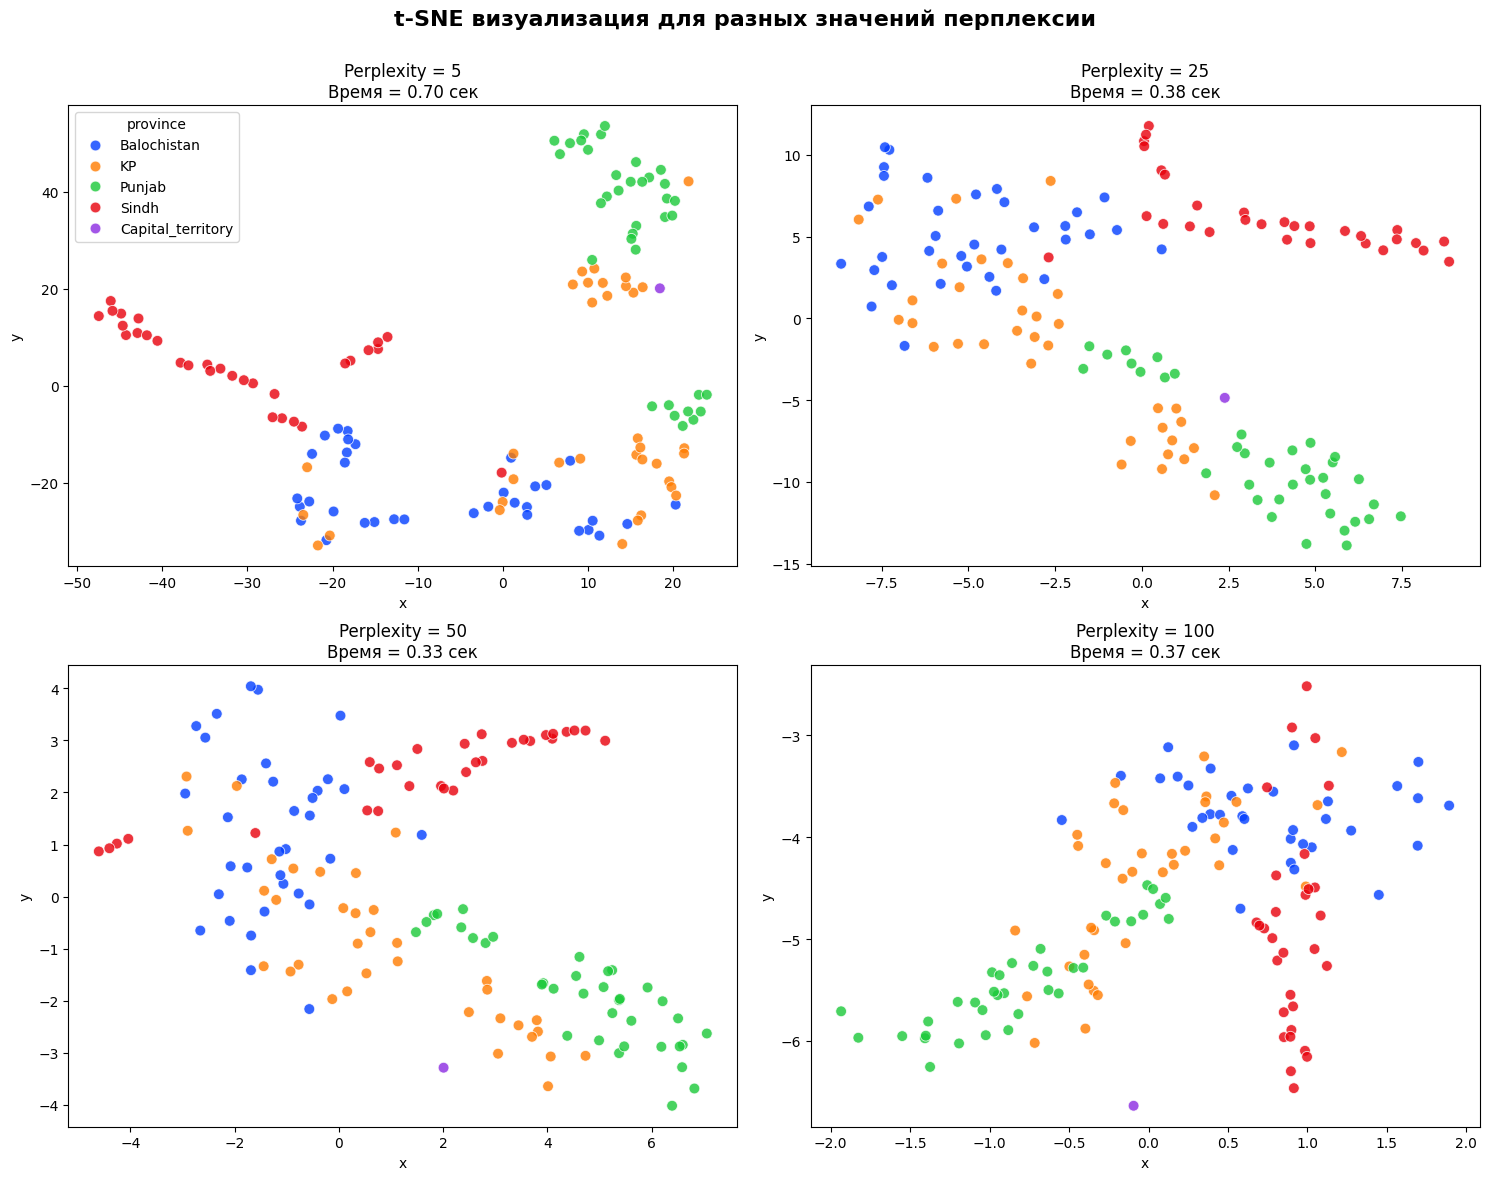

In [18]:
perplexities = [5, 25, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('t-SNE визуализация для разных значений перплексии', fontsize=16, fontweight='bold')

for i, (perplexity, ax) in enumerate(zip(perplexities, axes.flat)):
    data, elapsed = tsne_data(df_filtered, perplexity)
    sns.scatterplot(x='x', y='y', hue=df['province'], data=data,
                   palette='bright', ax=ax, s=60, alpha=0.8)
    ax.set_title(f'Perplexity = {perplexity}\nВремя = {elapsed:.2f} сек', fontsize=12)
    if i != 0:
        ax.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Задание 7

Выполнить визуализацию многомерных данных, используя UMAP с различными параметрами n_neighbors и min_dist. Рассчитать время
работы алгоритма с помощью библиотеки time и сравнить его с временем работы t-SNE.

In [19]:
def umap_data(df_filtered, n_neighbors, min_dist):
    start = time.time()
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=123)
    UMAP_features = reducer.fit_transform(df_filtered)
    end = time.time()
    elapsed = end - start
    
    data = df_filtered.copy()
    data['x'] = UMAP_features[:,0]
    data['y'] = UMAP_features[:,1]
    
    return data, elapsed

In [20]:
n_neighbors_list = [5, 15, 30, 50]
min_dist_list = [0.1, 0.5, 0.8, 1.0]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


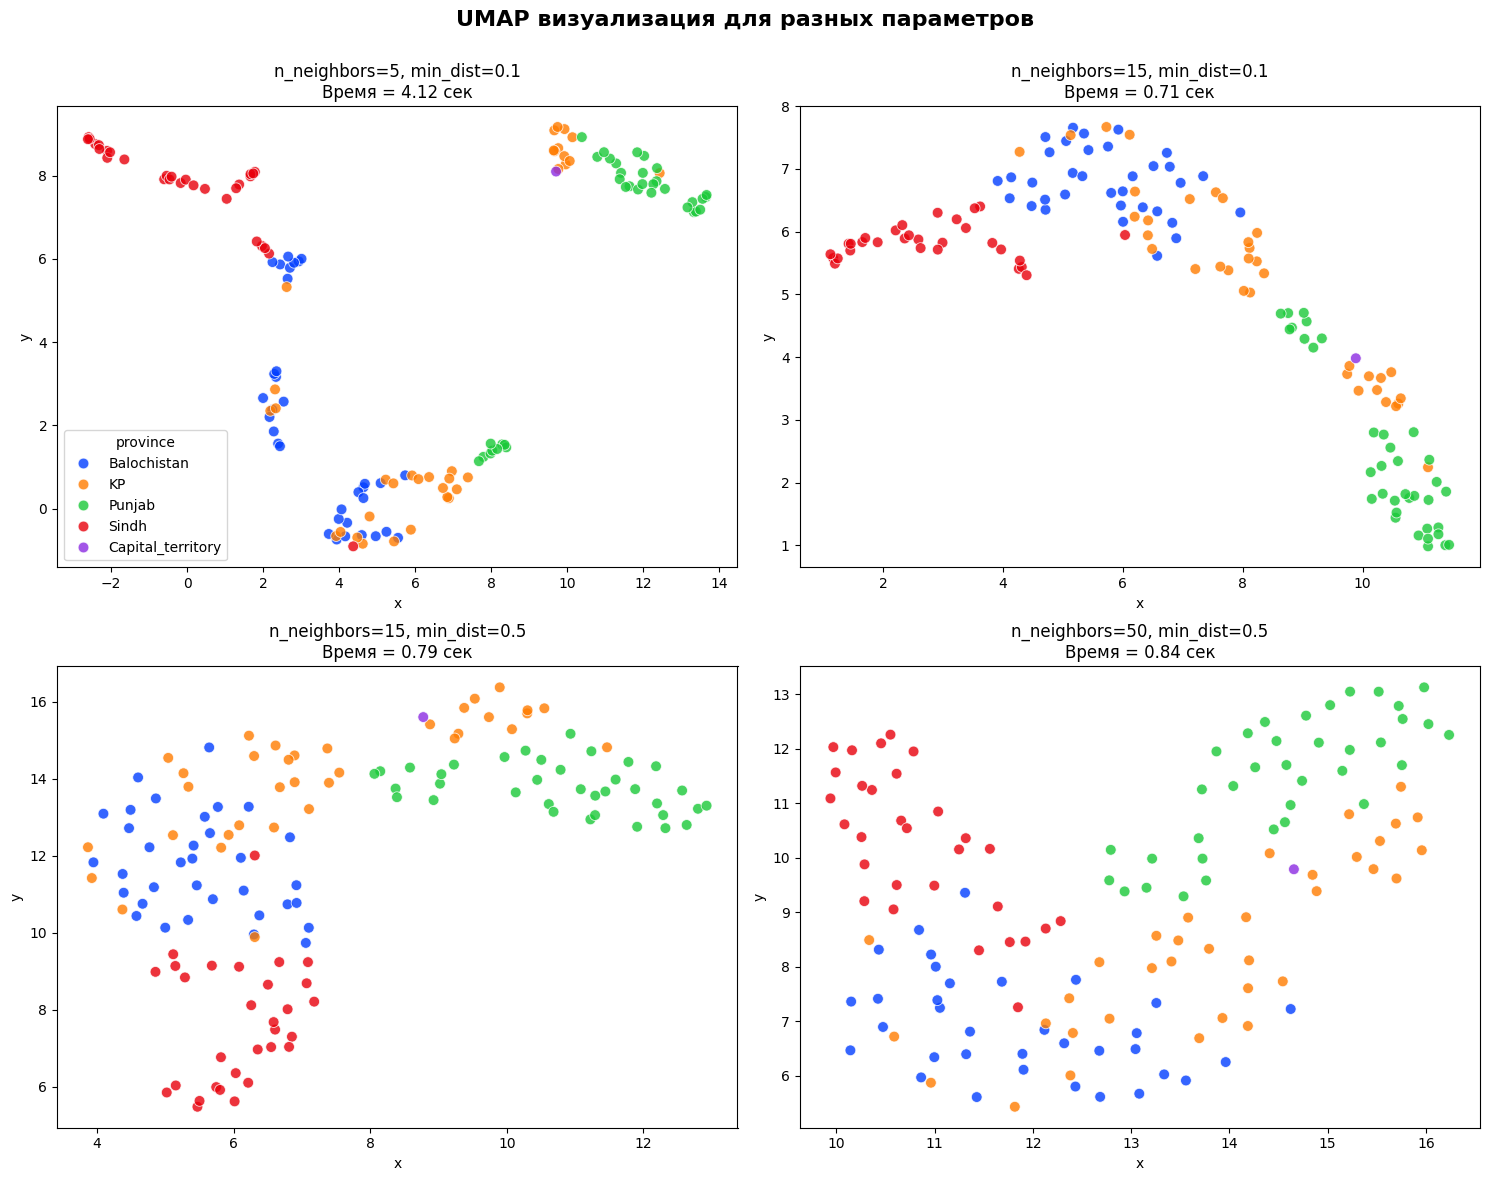

In [21]:
params = [(5, 0.1), (15, 0.1), (15, 0.5), (50, 0.5)]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UMAP визуализация для разных параметров', fontsize=16, fontweight='bold')

for i, ((n_neighbors, min_dist), ax) in enumerate(zip(params, axes.flat)):
    data, elapsed = umap_data(df_filtered, n_neighbors, min_dist)
    sns.scatterplot(x='x', y='y', hue=df['province'], data=data,
                   palette='bright', ax=ax, s=60, alpha=0.8)
    ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}\nВремя = {elapsed:.2f} сек',
                 fontsize=12)
    if i != 0:
        ax.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Как можно заметить, в среднем UMAP требуется больше времени на обработку, чем t-SNE

### Задание 8

На основе проделанной работы составить отчёт с описанием и скриншотами полученных результатов, сделать выводы о выбранных данных на основе полученных графиков, сравнить библиотеки. Начиная с 6 пункта отчёт дополнительно должен содержать результаты визуализации для разных значений параметров и выводы.